# Playground on the Enron set (created with alot of AI help)

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('/Users/merterol/Desktop/UZH/CompLing:CompSci/CL/Sem 5/Bachelors Thesis/VSCode/Bachelors-Thesis/data/enron_emails.csv')
df.head()

,from,to,text,label,path,source
0,shelley.corman@enron.com,"ava.garcia@enron.com, lynn.blair@enron.com, je...",Draft Transwestern PresentationAttached is a d...,0,maildir/blair-l/presentations/8.,enron
1,john.buchanan@enron.com,lynn.blair@enron.com,"NNG Winter Ops. presentationLynn,\nThis revise...",0,maildir/blair-l/presentations/3.,enron
2,shelley.corman@enron.com,"sheila.nacey@enron.com, lynn.blair@enron.com, ...",customerserv 10-25.pptRevised presentation for...,0,maildir/blair-l/presentations/4.,enron
3,lynn.blair@enron.com,shelley.corman@enron.com,"TW Shipper Imbalance PresentationShelley, I wo...",0,maildir/blair-l/presentations/6.,enron
4,bradley.holmes@enron.com,debbie.moore@enron.com,"Final reviewDebbie, \n\nI'm going through some...",0,maildir/blair-l/presentations/7.,enron


In [9]:
# Sample just 2000 emails for faster testing
print(f"Original dataset size: {len(df)}")

# Take a random sample of 2000 emails
sample_size = 2000
if len(df) > sample_size:
    df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)
    print(f"Sampled dataset size: {len(df)}")
else:
    print(f"Dataset has fewer than {sample_size} emails, using all {len(df)} emails")

df.head()

Original dataset size: 208359
Sampled dataset size: 2000


,from,to,text,label,path,source
0,michelle.cash@enron.com,kimberly.shoaf@enron.com,RE: Information Needed Urgent!Michelle Cash\nA...,0,maildir/cash-m/sent_items/218.,enron
1,mike.mcconnell@enron.com,kimberly.hillis@enron.com,Re: Diabetes ArticleThanks for the article. I ...,0,maildir/mcconnell-m/sent/378.,enron
2,cara.semperger@enron.com,"lisa.gang@enron.com, tom.alonso@enron.com, mar...",Line Derate info will be on our Preschedule Ca...,0,maildir/guzman-m/notes_inbox/1269.,enron
3,kam.keiser@enron.com,"m..love@enron.com, d..winfree@enron.com, scott...",EOL productsNow that we know which traders wil...,0,maildir/giron-d/inbox/63.,enron
4,phillip.love@enron.com,shane.dobbs@fctg.com,what time tomorrow?Hey what time were you meet...,0,maildir/love-p/_sent_mail/30.,enron


In [10]:
# Check data structure and prepare for modeling
print("Dataset info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nLabel distribution:")
print(df['label'].value_counts())
print(f"\nMissing values:")
print(df.isnull().sum())

# Check if we have text data
print(f"\nSample text length: {len(df['text'].iloc[0])}")
print(f"Text preview: {df['text'].iloc[0][:200]}...")

Dataset info:
Shape: (2000, 6)
Columns: ['from', 'to', 'text', 'label', 'path', 'source']

Label distribution:
label
0    2000
Name: count, dtype: int64

Missing values:
from       0
to        64
text       0
label      0
path       0
source     0
dtype: int64

Sample text length: 1203
Text preview: RE: Information Needed Urgent!Michelle Cash
Assistant General Counsel
Enron Wholesale Services
Legal Department
713-853-6401
Ass't: Twanda Sweet -- 713-853-9402

 -----Original Message-----
From: Shoa...


In [11]:
# Import required libraries for text processing and modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Prepare text data for modeling
# Note: Since all Enron emails are labeled as 0 (legitimate), we'll need to combine with spam data for classification
# For demonstration, let's work with text features and sender information

# Clean and prepare text data
df['text'] = df['text'].fillna('')  # Handle any missing text
df['from'] = df['from'].fillna('')  # Handle any missing sender info

# Create combined features: text + sender information
df['combined_text'] = df['text'] + ' ' + df['from']

print("Data prepared for modeling:")
print(f"Total emails: {len(df)}")
print(f"Average text length: {df['text'].str.len().mean():.0f} characters")
print(f"Text length distribution:")
print(df['text'].str.len().describe())

Data prepared for modeling:
Total emails: 2000
Average text length: 1683 characters
Text length distribution:
count      2000.000000
mean       1683.356500
std        5201.392544
min           7.000000
25%         318.000000
50%         770.500000
75%        1650.250000
max      145024.000000
Name: text, dtype: float64


In [13]:
# Since Enron data only has legitimate emails (label=0), let's create a binary classification
# using email characteristics. We'll classify emails by length (short vs long) as an example

# Create a binary classification problem based on email length
median_length = df['text'].str.len().median()
df['long_email'] = (df['text'].str.len() > median_length).astype(int)

print(f"Created binary classification:")
print(f"Median email length: {median_length:.0f} characters")
print(f"Short emails (0): {(df['long_email'] == 0).sum()}")
print(f"Long emails (1): {(df['long_email'] == 1).sum()}")

# Use text features to predict email length category
X = df['text']
y = df['long_email']

print(f"\nTarget distribution:")
print(y.value_counts(normalize=True))

Created binary classification:
Median email length: 770 characters
Short emails (0): 1000
Long emails (1): 1000

Target distribution:
long_email
1    0.5
0    0.5
Name: proportion, dtype: float64


In [14]:
# LOGISTIC REGRESSION MODEL
print("=" * 60)
print("LOGISTIC REGRESSION FOR EMAIL CLASSIFICATION")
print("=" * 60)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training target distribution: {y_train.value_counts(normalize=True).round(3).to_dict()}")

# Create pipeline with TF-IDF vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,          # Limit vocabulary size
        stop_words='english',       # Remove common English stop words
        ngram_range=(1, 2),         # Use unigrams and bigrams
        min_df=2,                   # Ignore terms that appear in fewer than 2 documents
        max_df=0.95                 # Ignore terms that appear in more than 95% of documents
    )),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,              # Increase iterations for convergence
        C=1.0                       # Regularization strength
    ))
])

print("\nTraining logistic regression model...")
pipeline.fit(X_train, y_train)

LOGISTIC REGRESSION FOR EMAIL CLASSIFICATION
Training set size: 1600
Test set size: 400
Training target distribution: {1: 0.5, 0: 0.5}

Training logistic regression model...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: invalid value encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)


,steps,"[('tfidf', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


Making predictions...

Model Performance:
Accuracy: 0.8575

Detailed Classification Report:
              precision    recall  f1-score   support

 Short Email       0.89      0.82      0.85       200
  Long Email       0.83      0.90      0.86       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400


Confusion Matrix:
[[164  36]
 [ 21 179]]


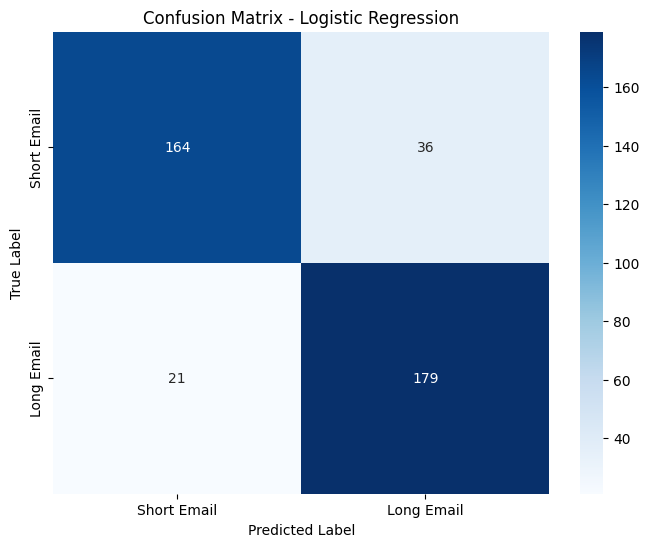

In [15]:
# Make predictions and evaluate the model
print("Making predictions...")
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Short Email', 'Long Email']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Short Email', 'Long Email'],
            yticklabels=['Short Email', 'Long Email'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

FEATURE IMPORTANCE ANALYSIS
Top 10 features most predictive of LONG emails (positive coefficients):
  com                  | coefficient:   2.5380
  enron                | coefficient:   2.4681
  ect                  | coefficient:   2.0261
  thanks               | coefficient:  -1.9642
  message              | coefficient:   1.9278
  original             | coefficient:   1.5454
  energy               | coefficient:   1.4877
  market               | coefficient:   1.4407
  original message     | coefficient:   1.3801
  make                 | coefficient:   1.3613

Top 10 features most predictive of SHORT emails (negative coefficients):
  appointment          | coefficient:   0.0005
  gas pipeline         | coefficient:   0.0005
  york ny              | coefficient:   0.0004
  indian               | coefficient:  -0.0004
  wells                | coefficient:   0.0004
  rejected             | coefficient:  -0.0002
  allen                | coefficient:   0.0002
  increasing           | co

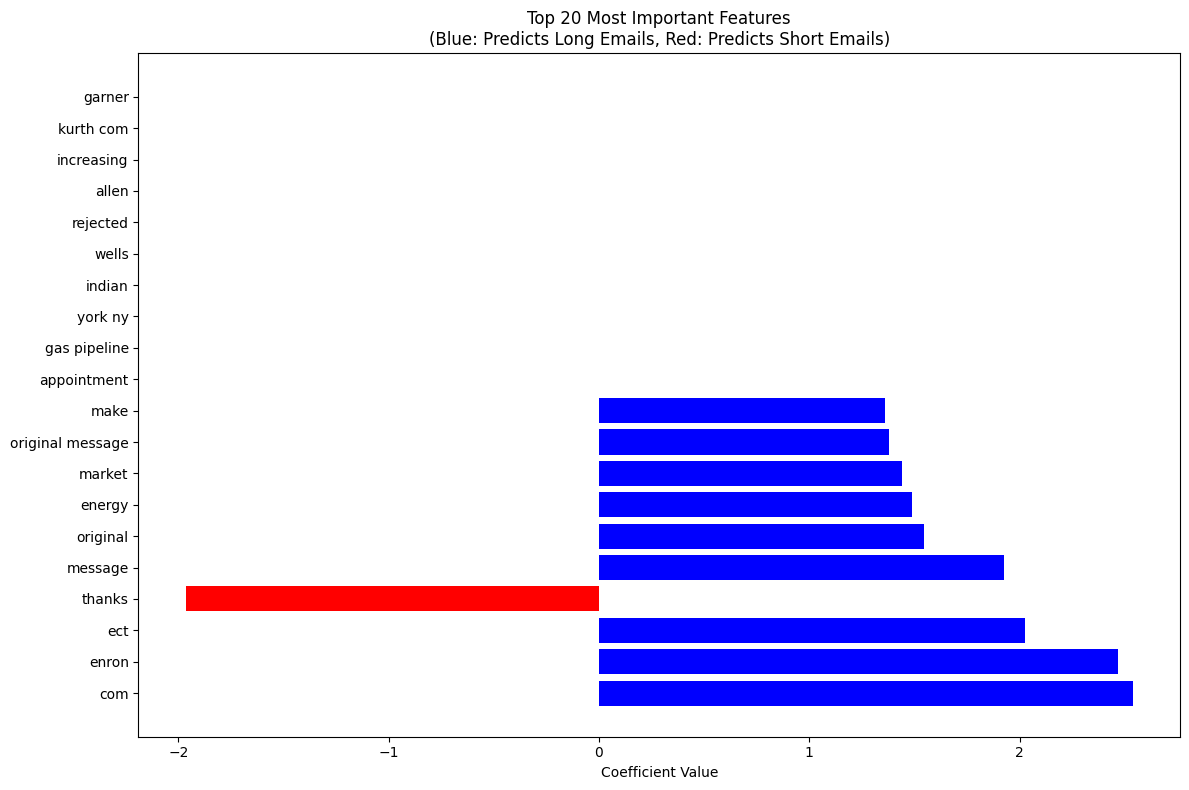

In [16]:
# Feature importance analysis
print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Get feature names and coefficients
feature_names = pipeline['tfidf'].get_feature_names_out()
coefficients = pipeline['classifier'].coef_[0]

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=False)

# Display top features for each class
print("Top 10 features most predictive of LONG emails (positive coefficients):")
top_long = feature_importance.head(10)
for idx, row in top_long.iterrows():
    print(f"  {row['feature']:20} | coefficient: {row['coefficient']:8.4f}")

print(f"\nTop 10 features most predictive of SHORT emails (negative coefficients):")
top_short = feature_importance.tail(10)
for idx, row in top_short.iterrows():
    print(f"  {row['feature']:20} | coefficient: {row['coefficient']:8.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = pd.concat([top_long.head(10), top_short.tail(10)])
colors = ['red' if x < 0 else 'blue' for x in top_features['coefficient']]
plt.barh(range(len(top_features)), top_features['coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Most Important Features\n(Blue: Predicts Long Emails, Red: Predicts Short Emails)')
plt.tight_layout()
plt.show()

In [17]:
# SPAM DETECTION TEST: Predict if Enron emails are spam (they should all be legitimate!)
print("=" * 70)
print("SPAM DETECTION CHALLENGE: TESTING ON ENRON EMAILS")
print("=" * 70)

print("CHALLENGE: All Enron emails are legitimate (label=0), but let's see what")
print("a spam classifier trained on external data would predict!")
print()

# Load your merged spam/ham dataset for training
try:
    print("Loading your spam/ham training data...")
    spam_ham_df = pd.read_csv('/Users/merterol/Desktop/UZH/CompLing:CompSci/CL/Sem 5/Bachelors Thesis/VSCode/Bachelors-Thesis/data/merged.csv')
    print(f"Spam/Ham dataset loaded: {len(spam_ham_df)} emails")
    print("Label distribution in training data:")
    print(spam_ham_df['label'].value_counts())
    
    # Use the spam/ham data for training
    X_train_spam = spam_ham_df['text']
    y_train_spam = spam_ham_df['label']  # 0=legit, 1=spam
    
    # Train a spam classifier
    print("\nTraining spam classifier on external spam/ham data...")
    spam_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(
            max_features=5000,
            stop_words='english',
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.95
        )),
        ('classifier', LogisticRegression(
            random_state=42,
            max_iter=1000,
            C=1.0
        ))
    ])
    
    spam_pipeline.fit(X_train_spam, y_train_spam)
    print("Spam classifier trained successfully!")
    
    # Now test on Enron emails (should all be predicted as legitimate)
    print("\nTesting spam classifier on Enron emails...")
    enron_text = df['text']  # Using our sampled Enron data
    enron_predictions = spam_pipeline.predict(enron_text)
    enron_probabilities = spam_pipeline.predict_proba(enron_text)
    
    # Analyze results
    print(f"\nRESULTS:")
    print(f"Total Enron emails tested: {len(enron_predictions)}")
    print(f"Predicted as LEGITIMATE (0): {(enron_predictions == 0).sum()}")
    print(f"Predicted as SPAM (1): {(enron_predictions == 1).sum()}")
    print(f"Accuracy (should be 100% for legitimate): {(enron_predictions == 0).mean()*100:.1f}%")
    
    # Show confidence scores
    spam_probabilities = enron_probabilities[:, 1]  # Probability of being spam
    legit_probabilities = enron_probabilities[:, 0]  # Probability of being legitimate
    
    print(f"\nConfidence Analysis:")
    print(f"Average spam probability: {spam_probabilities.mean():.3f}")
    print(f"Average legitimate probability: {legit_probabilities.mean():.3f}")
    print(f"Emails with >50% spam probability: {(spam_probabilities > 0.5).sum()}")
    print(f"Emails with >90% legitimate probability: {(legit_probabilities > 0.9).sum()}")
    
except FileNotFoundError:
    print("Could not find merged.csv file. Let's create a mock spam classifier instead...")
    
    # Create a simple mock classifier using word patterns
    def mock_spam_classifier(text):
        spam_words = ['free', 'win', 'money', 'offer', 'click', 'buy', 'sale', 'urgent', 'limited']
        spam_score = sum(1 for word in spam_words if word.lower() in text.lower())
        return 1 if spam_score >= 2 else 0
    
    print("Using mock spam classifier based on keyword detection...")
    mock_predictions = df['text'].apply(mock_spam_classifier)
    
    print(f"\nMOCK RESULTS:")
    print(f"Total Enron emails tested: {len(mock_predictions)}")
    print(f"Predicted as LEGITIMATE (0): {(mock_predictions == 0).sum()}")
    print(f"Predicted as SPAM (1): {(mock_predictions == 1).sum()}")
    print(f"Accuracy (should be close to 100%): {(mock_predictions == 0).mean()*100:.1f}%")

SPAM DETECTION CHALLENGE: TESTING ON ENRON EMAILS
CHALLENGE: All Enron emails are legitimate (label=0), but let's see what
a spam classifier trained on external data would predict!

Loading your spam/ham training data...
Spam/Ham dataset loaded: 128398 emails
Label distribution in training data:
label
1    67648
0    60750
Name: count, dtype: int64

Training spam classifier on external spam/ham data...
Spam/Ham dataset loaded: 128398 emails
Label distribution in training data:
label
1    67648
0    60750
Name: count, dtype: int64

Training spam classifier on external spam/ham data...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: invalid value encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)


Spam classifier trained successfully!

Testing spam classifier on Enron emails...

RESULTS:
Total Enron emails tested: 2000
Predicted as LEGITIMATE (0): 1770
Predicted as SPAM (1): 230
Accuracy (should be 100% for legitimate): 88.5%

Confidence Analysis:
Average spam probability: 0.133
Average legitimate probability: 0.867
Emails with >50% spam probability: 230
Emails with >90% legitimate probability: 1488

RESULTS:
Total Enron emails tested: 2000
Predicted as LEGITIMATE (0): 1770
Predicted as SPAM (1): 230
Accuracy (should be 100% for legitimate): 88.5%

Confidence Analysis:
Average spam probability: 0.133
Average legitimate probability: 0.867
Emails with >50% spam probability: 230
Emails with >90% legitimate probability: 1488


In [18]:
# Show specific examples of predictions
print("=" * 70)
print("DETAILED PREDICTION EXAMPLES")
print("=" * 70)

# Show some emails that were (incorrectly) classified as spam
if 'enron_predictions' in locals() and 'enron_probabilities' in locals():
    spam_probabilities = enron_probabilities[:, 1]
    
    # Find emails with highest spam probability (false positives)
    high_spam_indices = spam_probabilities.argsort()[-5:][::-1]  # Top 5 highest spam probabilities
    
    print("TOP 5 ENRON EMAILS WITH HIGHEST SPAM PROBABILITY:")
    print("(These are FALSE POSITIVES - they're actually legitimate!)")
    print("-" * 70)
    
    for i, idx in enumerate(high_spam_indices):
        prediction = enron_predictions[idx]
        spam_prob = spam_probabilities[idx]
        legit_prob = enron_probabilities[idx, 0]
        text_preview = df.iloc[idx]['text'][:200] + "..."
        sender = df.iloc[idx]['from']
        
        print(f"\nExample {i+1}:")
        print(f"Prediction: {'SPAM' if prediction == 1 else 'LEGITIMATE'}")
        print(f"Spam Probability: {spam_prob:.3f}")
        print(f"Legitimate Probability: {legit_prob:.3f}")
        print(f"Sender: {sender}")
        print(f"Text: {text_preview}")
        print("-" * 50)
    
    # Find emails with lowest spam probability (correctly classified)
    low_spam_indices = spam_probabilities.argsort()[:5]  # Bottom 5 lowest spam probabilities
    
    print(f"\nTOP 5 ENRON EMAILS WITH LOWEST SPAM PROBABILITY:")
    print("(These are correctly identified as legitimate)")
    print("-" * 70)
    
    for i, idx in enumerate(low_spam_indices):
        prediction = enron_predictions[idx]
        spam_prob = spam_probabilities[idx]
        legit_prob = enron_probabilities[idx, 0]
        text_preview = df.iloc[idx]['text'][:200] + "..."
        sender = df.iloc[idx]['from']
        
        print(f"\nExample {i+1}:")
        print(f"Prediction: {'SPAM' if prediction == 1 else 'LEGITIMATE'}")
        print(f"Spam Probability: {spam_prob:.3f}")
        print(f"Legitimate Probability: {legit_prob:.3f}")
        print(f"Sender: {sender}")
        print(f"Text: {text_preview}")
        print("-" * 50)

else:
    print("Spam classifier results not available. Run the previous cell first!")

DETAILED PREDICTION EXAMPLES
TOP 5 ENRON EMAILS WITH HIGHEST SPAM PROBABILITY:
(These are FALSE POSITIVES - they're actually legitimate!)
----------------------------------------------------------------------

Example 1:
Prediction: SPAM
Spam Probability: 0.991
Legitimate Probability: 0.009
Sender: vince.kaminski@enron.com
Text: Re: Software breakthrough will increase your sales/biz..WATCH!!Please remove me from the list.






05196715@juno.com on 12/09/2000 09:36:23 PM
To: breakthrough@juno.com
cc: 
Subject: Software breakt...
--------------------------------------------------

Example 2:
Prediction: SPAM
Spam Probability: 0.987
Legitimate Probability: 0.013
Sender: dutch.quigley@enron.com
Text: anson vpp Quotesnymex offer 3.305...
--------------------------------------------------

Example 3:
Prediction: SPAM
Spam Probability: 0.985
Legitimate Probability: 0.015
Sender: 174@daum.net
Text: Copy Playstaion FREE                   29462COPY ANY DVD MOVIE! With our revolutionary software